## Linear regression on the Housing dataset

See: Deep Learning with TensorFlow, Md. Rezaul Karim, Giancarlo Zaccone

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from numpy import genfromtxt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [52]:
def readBostonData():
    boston = load_boston()
    features = np.array(boston.data)
    labels = np.array(boston.target)
    return features, labels

In [53]:
def normalizer(dataset):
    mu = np.mean(dataset, axis = 0)
    sigma = np.std(dataset, axis = 0)
    return (dataset - mu) / sigma

In [54]:
def biasVector(features, labels):
    return np.concatenate((np.ones((features.shape[0], 1), dtype = np.float64), 
                           features), axis = 1), labels[:, np.newaxis]
    

In [55]:
features, labels = readBostonData()

In [56]:
normalizedFeatures = normalizer(features)

In [57]:
data, label = biasVector(normalizedFeatures, labels)
print("data: {}, label: {}".format(data.shape, label.shape))

data: (506, 14), label: (506, 1)


In [58]:
trainX, testX, trainY, testY = train_test_split(data, label, test_size = 0.25, random_state = 100)
print("trainX: {}, testX: {}, trainY: {}, testY: {}".format(
    trainX.shape, testX.shape, trainY.shape, testY.shape))

trainX: (379, 14), testX: (127, 14), trainY: (379, 1), testY: (127, 1)


In [59]:
learningRate = 0.01
trainingEpochs = 100000
logLoss = np.empty(shape = (1,), dtype = np.float64)
nDim = data.shape[1]

Placeholders:

In [60]:
X = tf.placeholder(tf.float64, (None, nDim))
Y = tf.placeholder(tf.float64, (None, 1))
W = tf.Variable(tf.ones((nDim, 1), dtype = tf.float64))

In [61]:
y_ = tf.matmul(X, W)
costOp = tf.reduce_mean(tf.square(y_ - Y))
trainingStep = tf.train.GradientDescentOptimizer(learningRate).minimize(costOp)

In [62]:
init = tf.global_variables_initializer()

In [63]:
sess = tf.Session()

In [64]:
sess.run(init)

In [65]:
lossValues = []
for epoch in range(trainingEpochs):
    sess.run(trainingStep, feed_dict = {X: trainX, Y: trainY})
    lossValues.append(sess.run(costOp, feed_dict = {X: trainX, Y: trainY}))

Text(0, 0.5, 'cost')

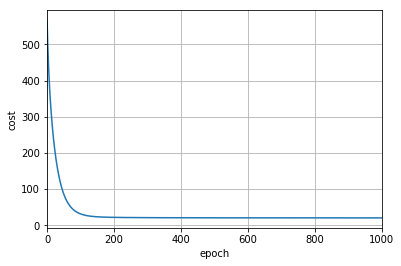

In [66]:
fig = plt.figure()
ax = plt.axes()
ax.plot(range(len(lossValues)), lossValues)
ax.grid(True)
ax.set_xlim(0, 1000)
ax.set_xlabel('epoch')
ax.set_ylabel('cost')

In [67]:
predY = sess.run(y_, feed_dict = {X: testX})
mse = tf.reduce_mean(tf.square(predY - testY))
mseValue = sess.run(mse)
print('MSE on the test set: {}'.format(mseValue))

MSE on the test set: 27.17314417304368


Text(0, 0.5, 'Predicted')

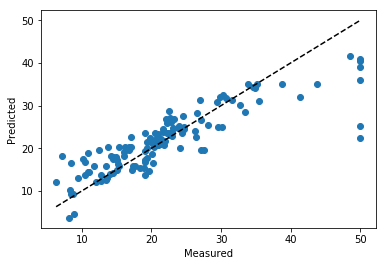

In [68]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(testY, predY)
ax.plot((testY.min(), testY.max()), (testY.min(), testY.max()), 'k--')
ax.set_xlabel('Measured'); ax.set_ylabel('Predicted')

In [69]:
sess.close()